In [1]:
import sys
import numpy
import pandas
import matplotlib
import seaborn
import scipy
import sklearn
print('Python: {}'.format(sys.version))
print('Numpy: {}'.format(numpy.__version__))
print('Pandas: {}'.format(pandas.__version__))
print('Matplotlib: {}'.format(matplotlib.__version__))
print('Seaborn: {}'.format(seaborn.__version__))
print('Scipy: {}'.format(scipy.__version__))
print('Sklearn: {}'.format(sklearn.__version__))

Python: 3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 12:04:33) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
Numpy: 1.14.2
Pandas: 0.23.4
Matplotlib: 2.1.2
Seaborn: 0.8.1
Scipy: 1.0.0
Sklearn: 0.20.1


In [2]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import random

In [3]:
d = pd.read_csv('creditcard.csv', low_memory=False)
d = d.sample(frac=1).reset_index(drop=True)
d.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,76995.0,-1.027835,0.924215,1.885737,0.874969,0.612837,-0.159848,0.683418,0.064475,-1.274356,...,-0.320432,-0.983807,-0.060088,0.172617,-0.053214,-0.713980,0.017609,0.043134,33.50,0
1,156084.0,1.928671,-0.038188,-1.827506,0.614063,0.026633,-1.545956,0.306277,-0.363386,0.715239,...,0.219820,0.619357,-0.067871,-0.047609,0.197591,-0.107926,-0.019369,-0.019281,68.95,0
2,84289.0,0.296428,1.689439,-1.954393,1.643363,0.720899,-1.757518,0.599327,0.078162,-0.422381,...,-0.092386,-0.069571,0.228375,0.159298,-0.539078,-0.462599,-0.163576,-0.294214,0.89,0
3,44686.0,-1.250704,0.819374,1.213428,0.513111,1.319954,0.498988,0.536566,-0.065292,-0.627821,...,-0.066568,-0.004673,-0.277957,-1.283640,0.551222,-0.217163,-0.238507,0.102379,4.74,0
4,63302.0,-1.067709,-0.885098,2.146532,0.620595,5.480892,-2.393705,-7.216245,-0.996823,1.779951,...,1.436387,-2.168015,-9.873411,-0.855139,-1.292436,-0.574897,0.711660,0.507173,9.99,0


In [4]:
Fraud = d[d['Class'] == 1]
Valid = d[d['Class'] == 0]


print('Fraud/Misuse Cases: {}'.format(len(Fraud)))
print('Valid Transactions: {}'.format(len(Valid)))

Fraud/Misuse Cases: 492
Valid Transactions: 284315


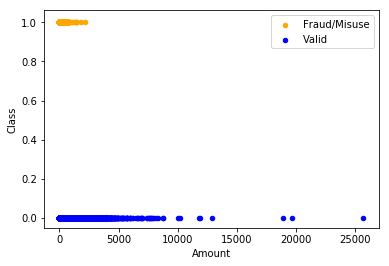

In [5]:
ax = Fraud.plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud/Misuse')
Valid.plot.scatter(x='Amount', y='Class', color='Blue', label='Valid', ax=ax)
plt.show()

In [6]:
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [7]:
X = d.iloc[:,:-1]
y = d['Class']

print("X Size:", len(X))
print("Y Size:", len(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)
print("Train Size:", len(X_train), len(y_train))
print("Test Size:", len(X_test), len(y_test))
print("Total No. of Frauds:", len(y.loc[d['Class'] == 1]), len(y.loc[d['Class'] == 1])/len(y))
print("No. of Frauds on y_test:", len(y_test.loc[d['Class'] == 1]), len(y_test.loc[d['Class'] == 1]) / len(y_test))
print("No. of Frauds on y_train:", len(y_train.loc[d['Class'] == 1]), len(y_train.loc[d['Class'] == 1])/len(y_train))

X Size: 284807
Y Size: 284807
Train Size: 185124 185124
Test Size: 99683 99683
Total No. of Frauds: 492 0.001727485630620034
No. of Frauds on y_test: 178 0.0017856605439242397
No. of Frauds on y_train: 314 0.0016961604113999264


In [8]:
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(X_train, y_train)
print("Logistic Score: ", logistic.score(X_test, y_test))

/Users/Vikki/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Score:  0.998896501911058


In [9]:
y_predicted = np.array(logistic.predict(X_test))
y_right = np.array(y_test)

Confusion matrix:
Predicted  False  True  __all__
Actual                         
False      99464    41    99505
True          69   109      178
__all__    99533   150    99683


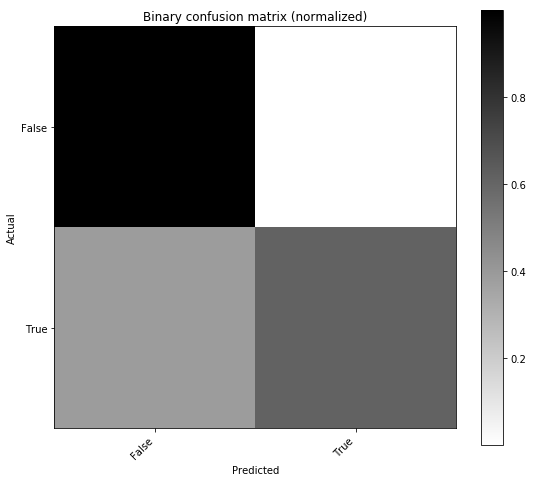

population: 99683
P: 178
N: 99505
PositiveTest: 150
NegativeTest: 99533
TP: 109
TN: 99464
FP: 41
FN: 69
TPR: 0.6123595505617978
TNR: 0.9995879604039998
PPV: 0.7266666666666667
NPV: 0.9993067625812545
FPR: 0.000412039596000201
FDR: 0.2733333333333333
FNR: 0.38764044943820225
ACC: 0.998896501911058
F1_score: 0.6646341463414634
MCC: 0.6665265433991131
informedness: 0.6119475109657975
markedness: 0.7259734292479212
prevalence: 0.0017856605439242397
LRP: 1486.1667580158949
LRN: 0.3878002384917992
DOR: 3832.2997525627434
FOR: 0.0006932374187455417


In [10]:
#conda install -c conda-forge pandas_ml
from pandas_ml import ConfusionMatrix
confusion_matrix = ConfusionMatrix(y_right, y_predicted)
print("Confusion matrix:\n%s" % confusion_matrix)
confusion_matrix.plot(normalized=True)
plt.show()
confusion_matrix.print_stats()

In [11]:
print("False Negative Rate is {0}".format(confusion_matrix.stats()['FNR']))

False Negative Rate is 0.38764044943820225


In [12]:
#conda install -c conda-forge imbalanced-learn 
import pandas_ml as pdml
d2 = pdml.ModelFrame(X, target=y)
sampler = d2.imbalance.over_sampling.SMOTE()
sampled = d2.fit_sample(sampler)
print("Dataset size after over sampling:", len(sampled))

Dataset size after over sampling: 568630


In [13]:
X1 = sampled.iloc[:,1:]
y1 = sampled['Class']

X1 = scale(X1)

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1.as_matrix(), test_size=0.35, random_state=250)
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(X_train1, y_train1)
print("Logistic Score: ", logistic.score(X_test1, y_test1))

/Users/Vikki/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/Users/Vikki/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Score:  0.9806502831359505


Confusion matrix:
Predicted   False   True  __all__
Actual                           
False       98826    811    99637
True         3040  96344    99384
__all__    101866  97155   199021


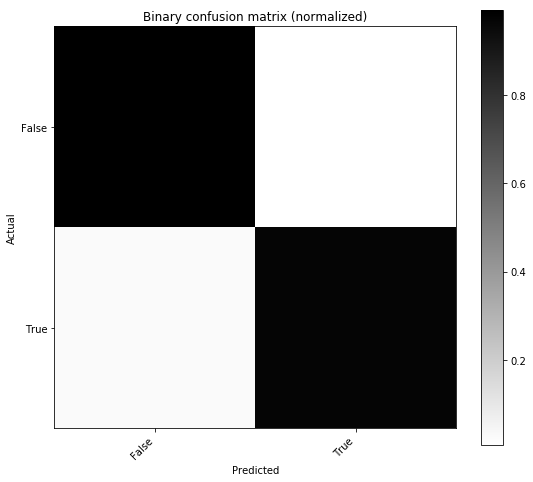

population: 199021
P: 99384
N: 99637
PositiveTest: 97155
NegativeTest: 101866
TP: 96344
TN: 98826
FP: 811
FN: 3040
TPR: 0.9694115753038719
TNR: 0.991860453446009
PPV: 0.9916525140239822
NPV: 0.9701568727544029
FPR: 0.008139546553990988
FDR: 0.008347485976017704
FNR: 0.03058842469612815
ACC: 0.9806502831359505
F1_score: 0.9804059245238859
MCC: 3.963595048049698
informedness: 0.9612720287498808
markedness: 0.961809386778385
prevalence: 0.49936438868260136
LRP: 119.0989656332329
LRN: 0.03083944378451137
DOR: 3861.9038159517163
FOR: 0.029843127245597158


/Users/Vikki/anaconda3/lib/python3.6/site-packages/pandas_ml/confusion_matrix/bcm.py:304: RuntimeWarning: overflow encountered in long_scalars
  (self.TN + self.FP) * (self.TN + self.FN)))


In [14]:
y_predicted1 = np.array(logistic.predict(X_test1))
y_right1 = np.array(y_test1)

confusion_matrix1 = ConfusionMatrix(y_right1, y_predicted1)
print("Confusion matrix:\n%s" % confusion_matrix1)
confusion_matrix1.plot(normalized=True)
plt.show()
confusion_matrix1.print_stats()

In [15]:
X2 = d.iloc[:,:-1]
y2 = d['Class']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2.as_matrix(), test_size=0.35, random_state=12)

/Users/Vikki/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [16]:
logistic = linear_model.LogisticRegression(C=1e5, class_weight="balanced")
logistic.fit(X_train2, y_train2)
print("Logistic Score: ", logistic.score(X_test2, y_test2))

/Users/Vikki/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Score:  0.9717705125247033


Confusion matrix:
Predicted  False  True  __all__
Actual                         
False      96710  2808    99518
True           6   159      165
__all__    96716  2967    99683


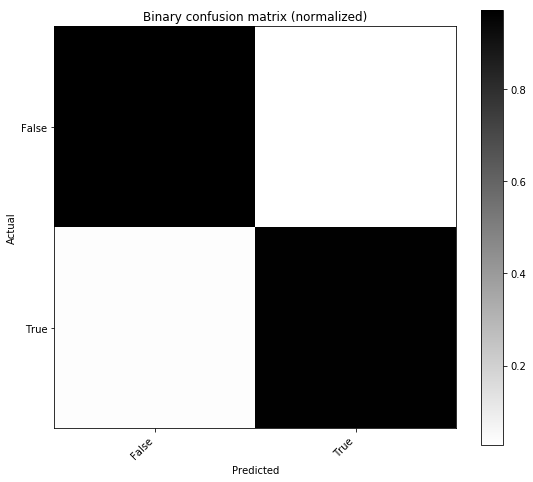

population: 99683
P: 165
N: 99518
PositiveTest: 2967
NegativeTest: 96716
TP: 159
TN: 96710
FP: 2808
FN: 6
TPR: 0.9636363636363636
TNR: 0.9717839988745754
PPV: 0.05358948432760364
NPV: 0.9999379626949005
FPR: 0.028216001125424547
FDR: 0.9464105156723963
FNR: 0.03636363636363636
ACC: 0.9717705125247033
F1_score: 0.10153256704980843
MCC: 0.22376475124128897
informedness: 0.9354203625109392
markedness: 0.053527447022504226
prevalence: 0.001655247133412919
LRP: 34.1521238021238
LRN: 0.03741946400203044
DOR: 912.6834045584046
FOR: 6.203730509946647e-05


In [17]:
y_predicted2 = np.array(logistic.predict(X_test2))
y_right2 = np.array(y_test2)
confusion_matrix2 = ConfusionMatrix(y_right2, y_predicted2)
print("Confusion matrix:\n%s" % confusion_matrix2)
confusion_matrix2.plot(normalized=True)
plt.show()
confusion_matrix2.print_stats()